<ipython-input-6-dd4432035c2c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales_top_5['Year-Month'] = monthly_sales_top_5['Order Date'].dt.strftime('%Y-%m')
<ipython-input-6-dd4432035c2c>:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales_top_5 = monthly_sales_top_5.groupby(['Product', 'Year-Month']).sum().reset_index()


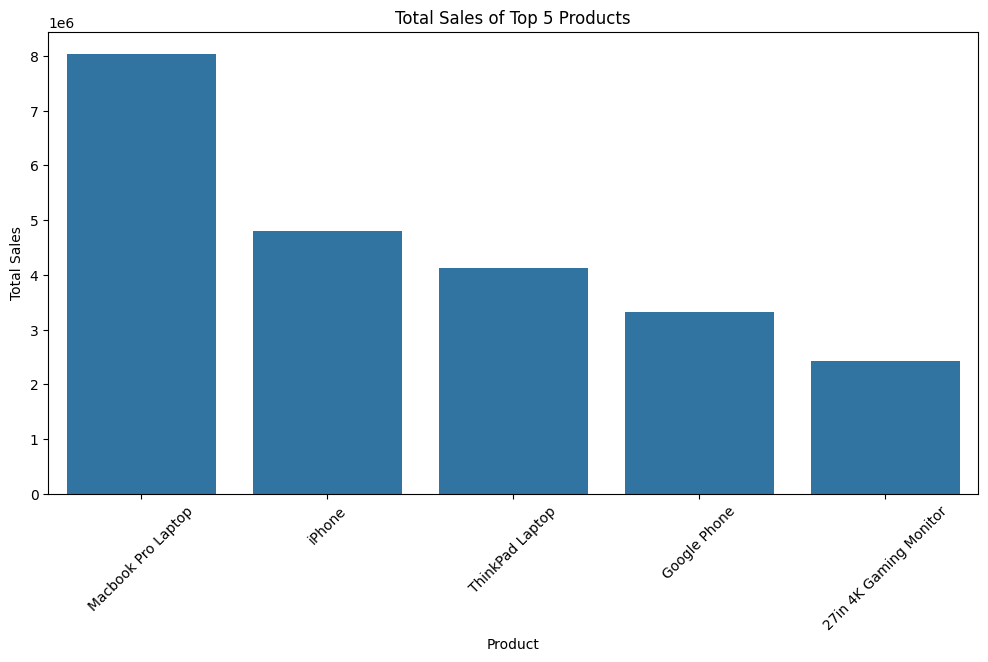

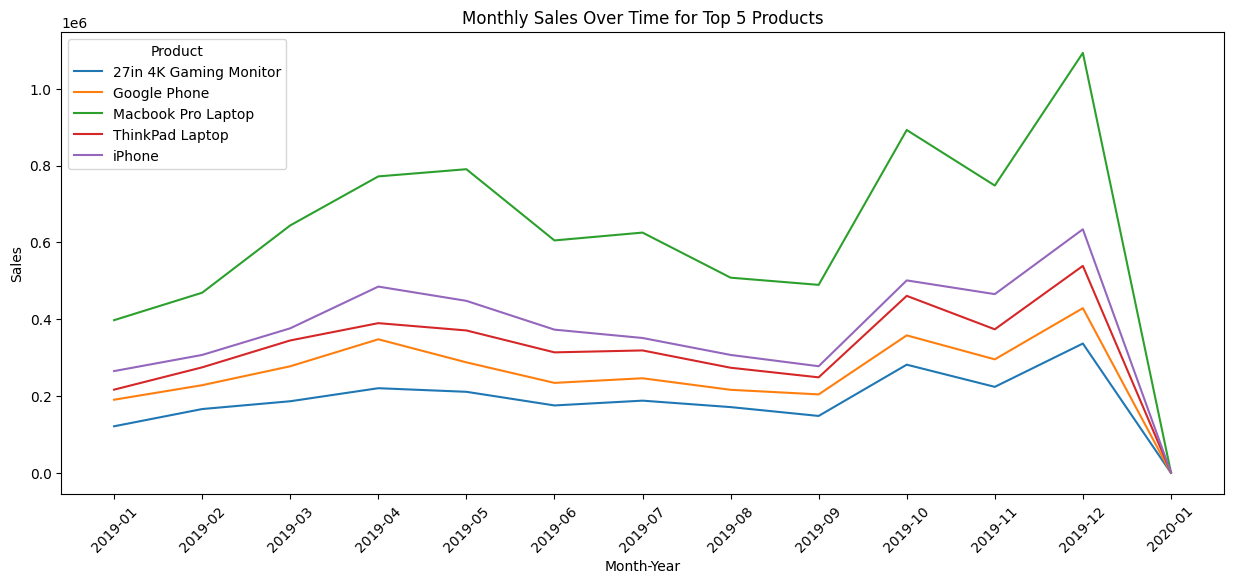

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read File
sales_data = pd.read_csv("Sales Data.csv")

# Convert 'Sales' column to numeric
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], errors='coerce')

# Make sure the 'Order Date' column is in datetime format to extract the month and year
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Total sales per product
total_sales_per_product = sales_data.groupby('Product')['Sales'].sum().sort_values(ascending=False).reset_index()

# Extracting the top 5 products based on total sales
top_5_products = total_sales_per_product.head(5)

# Extracting monthly sales data for these top 5 products
top_5_products_list = top_5_products['Product'].tolist()
monthly_sales_top_5 = sales_data[sales_data['Product'].isin(top_5_products_list)]

# Converting 'Order Date' to 'Year-Month' format
monthly_sales_top_5['Year-Month'] = monthly_sales_top_5['Order Date'].dt.strftime('%Y-%m')

# Grouping by 'Product' and 'Year-Month'
monthly_sales_top_5 = monthly_sales_top_5.groupby(['Product', 'Year-Month']).sum().reset_index()

# Plotting total sales for top 5 products
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_products, x='Product', y='Sales')
plt.title('Total Sales of Top 5 Products')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Product')
plt.show()

# Plotting monthly sales for top 5 products
plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales_top_5, x='Year-Month', y='Sales', hue='Product')
plt.title('Monthly Sales Over Time for Top 5 Products')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


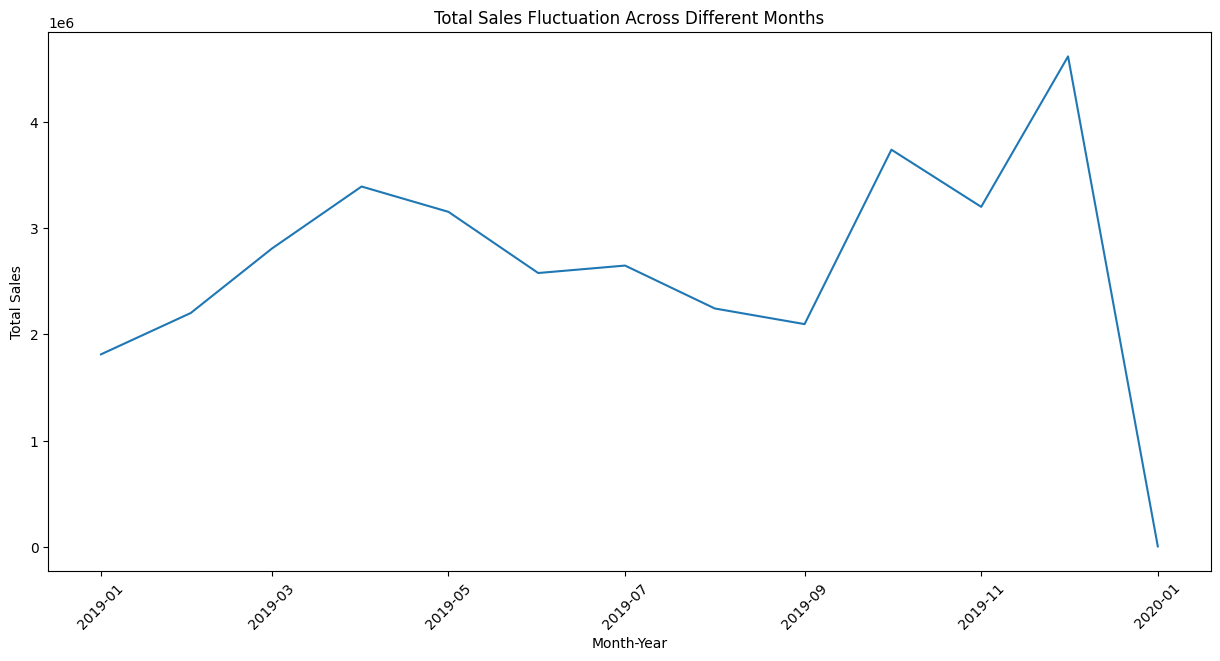

In [7]:
# To answer the question about seasonal demand trends, we will analyze the sales data by month.

# We have already read the data into 'sales_data' and ensured the 'Order Date' is in datetime format.
# Now, let's analyze how sales fluctuate across different months for all products.

# Extracting month and year from 'Order Date'
sales_data['Month-Year'] = sales_data['Order Date'].dt.strftime('%Y-%m')

# Grouping data by 'Month-Year' to analyze total sales per month
monthly_sales = sales_data.groupby('Month-Year')['Sales'].sum().reset_index()

# Sorting the dataframe by 'Month-Year' to ensure the plot follows the calendar sequence
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'])
monthly_sales = monthly_sales.sort_values('Month-Year')

# Plotting total monthly sales to identify trends
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales')
plt.title('Total Sales Fluctuation Across Different Months')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


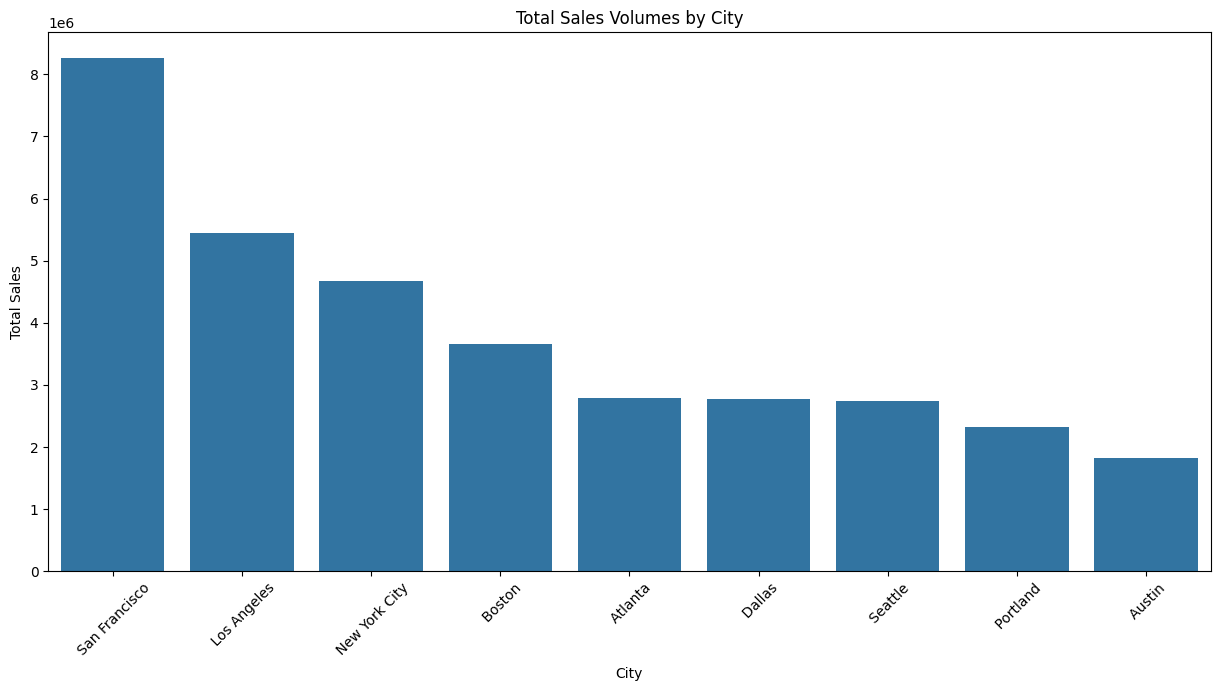

<ipython-input-8-0cee6f35f4bf>:25: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = city_product_sales.pivot('City', 'Product', 'Sales')


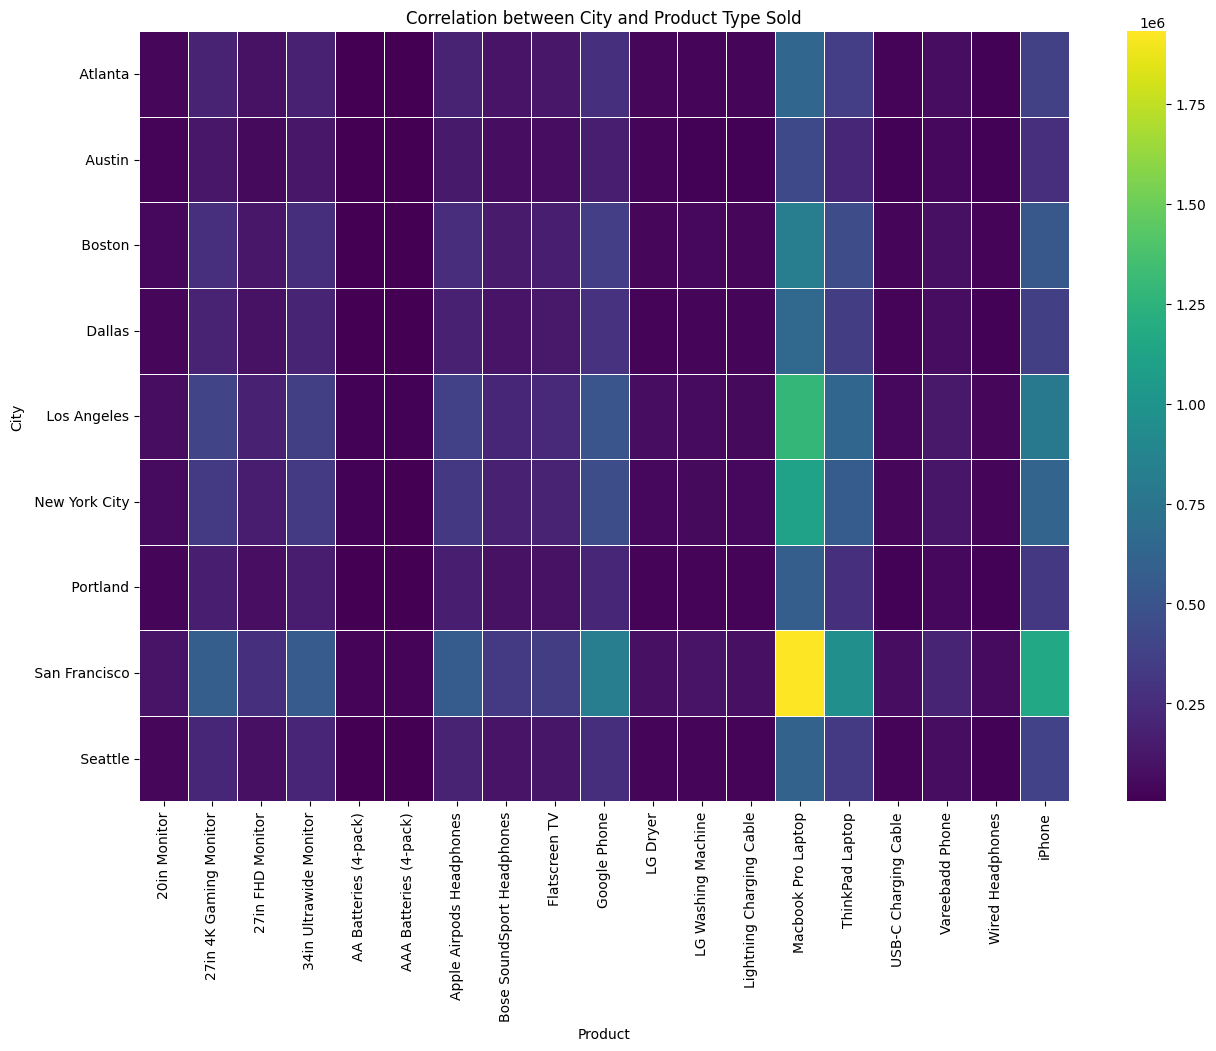

In [8]:
# To answer the question about geographical sales trends, we will analyze the sales data by city.

# We have already read the data into 'sales_data'. Now, let's analyze the sales volumes per city
# and check if there is a correlation between the city and the type of product sold.

# Grouping data by 'City' to analyze total sales per city
city_sales = sales_data.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()

# Grouping data by 'City' and 'Product' to analyze the sales volume per product type in each city
city_product_sales = sales_data.groupby(['City', 'Product'])['Sales'].sum().reset_index()

# Plotting total sales per city
plt.figure(figsize=(15, 7))
sns.barplot(data=city_sales, x='City', y='Sales')
plt.title('Total Sales Volumes by City')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.show()

# To examine the correlation between city and product type, we will create a pivot table
# and then a heatmap to visualize the correlation

# Creating a pivot table for the heatmap
pivot_table = city_product_sales.pivot('City', 'Product', 'Sales')
pivot_table = pivot_table.fillna(0) # Filling NaN values with 0 for better visualization

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=False, fmt=".1f", linewidths=.5, cmap='viridis')
plt.title('Correlation between City and Product Type Sold')
plt.xlabel('Product')
plt.ylabel('City')
plt.show()


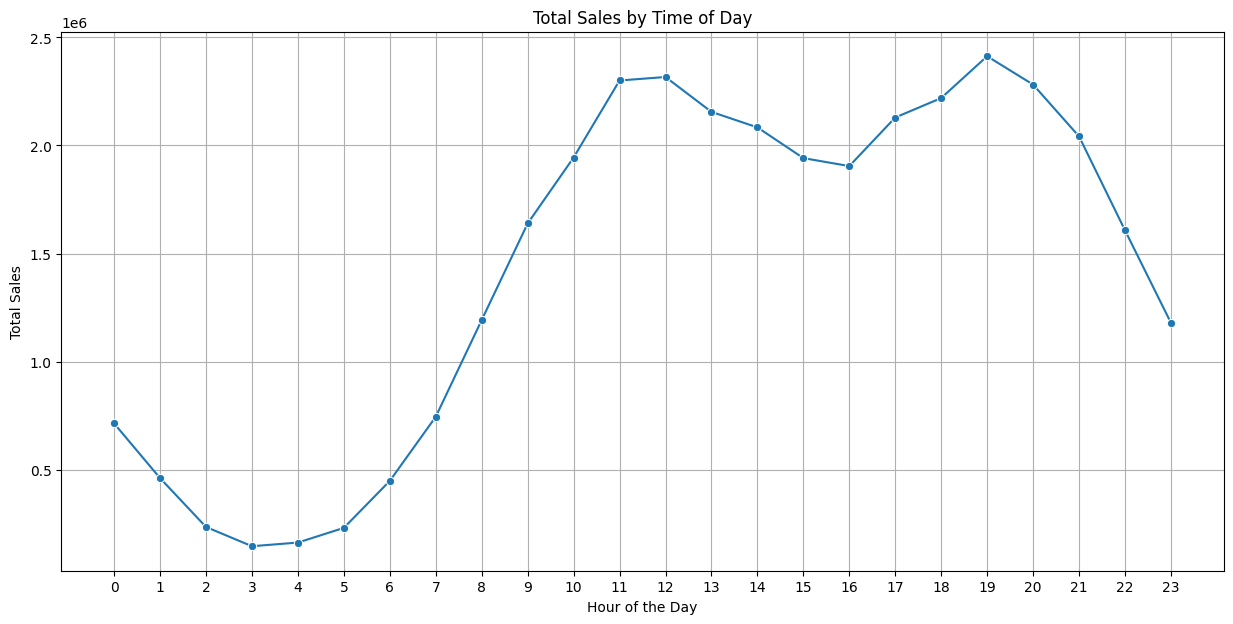

<ipython-input-11-5208cc4ca498>:25: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table_hour_product = hourly_product_sales.pivot('Hour', 'Product', 'Sales')


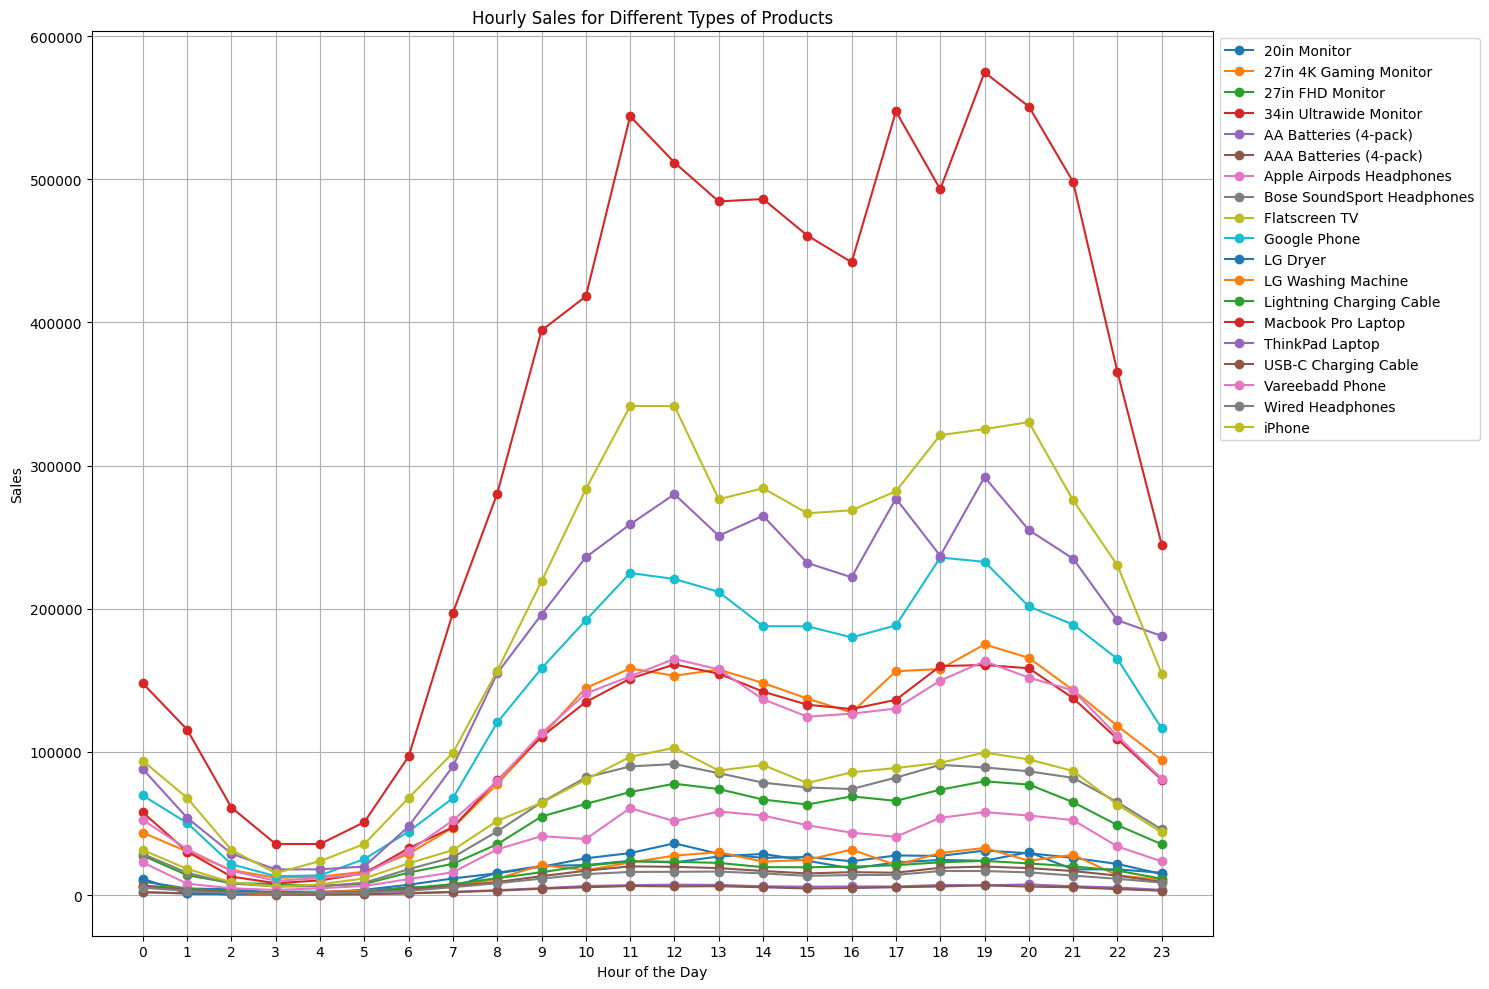

In [11]:


# Converting 'Order Date' to datetime to extract the hour
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Hour'] = sales_data['Order Date'].dt.hour

# Grouping data by 'Hour' to analyze total sales per hour
hourly_sales = sales_data.groupby('Hour')['Sales'].sum().reset_index()

# Grouping data by 'Hour' and 'Product' to analyze the sales volume per product type by hour
hourly_product_sales = sales_data.groupby(['Hour', 'Product'])['Sales'].sum().reset_index()

# Plotting total sales per hour
plt.figure(figsize=(15, 7))
sns.lineplot(data=hourly_sales, x='Hour', y='Sales', marker='o')
plt.title('Total Sales by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# To see how this varies for different types of products, we'll create a pivot table
# and then plot a line chart for each product type

# Creating a pivot table for the line charts
pivot_table_hour_product = hourly_product_sales.pivot('Hour', 'Product', 'Sales')
pivot_table_hour_product = pivot_table_hour_product.fillna(0) # Filling NaN values with 0 for better visualization

# Plotting a line chart for each product type to see the hourly sales trend
plt.figure(figsize=(15, 10))
for column in pivot_table_hour_product.columns:
    plt.plot(pivot_table_hour_product.index, pivot_table_hour_product[column], marker='o', label=column)
plt.title('Hourly Sales for Different Types of Products')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales')
plt.xticks(range(0, 24))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


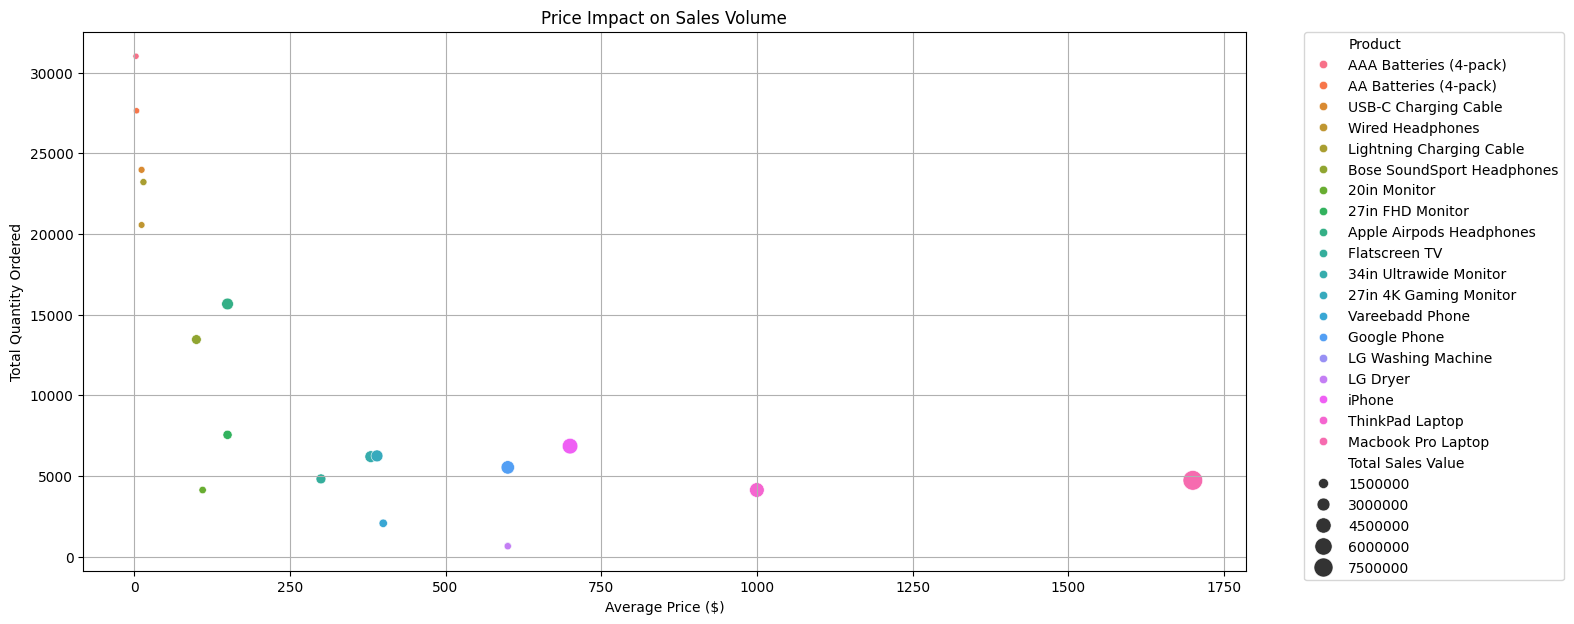

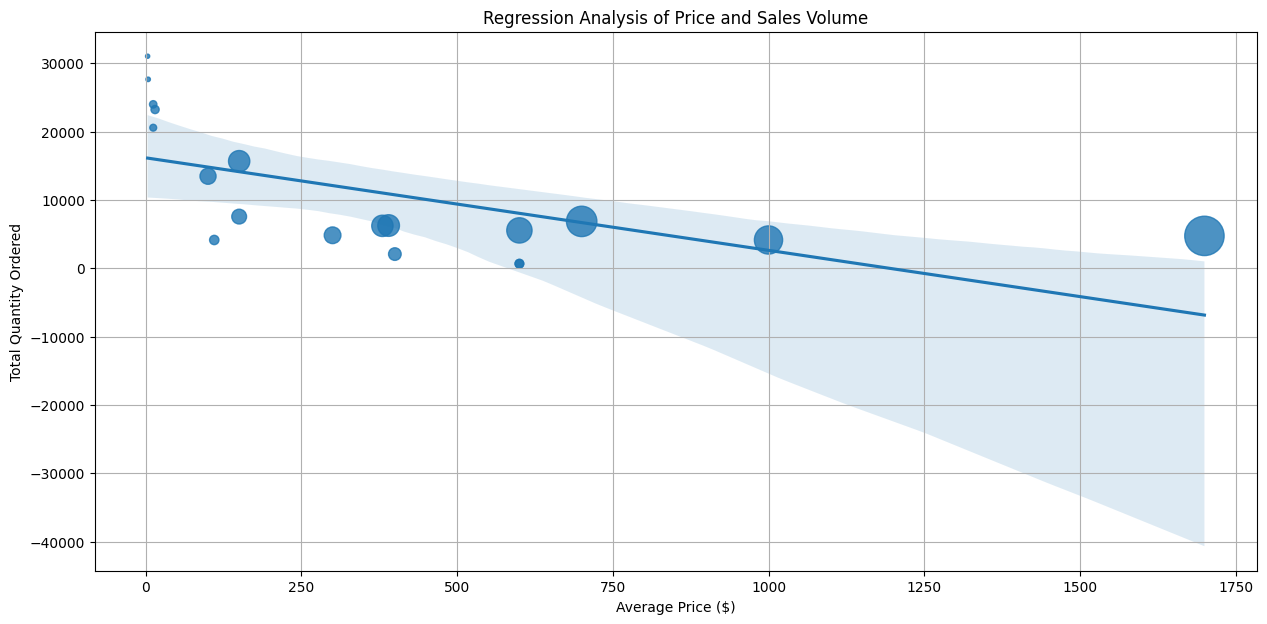

In [12]:
# To answer the question about the impact of price on sales volume, we'll analyze the relationship between the price of products and the sales volume.

# We'll create a new column that represents the total sales value for each product
sales_data['Total Sales Value'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

# Now, let's group the data by 'Product' and calculate the average price and total sales volume
product_sales_summary = sales_data.groupby('Product').agg({
    'Price Each': 'mean',
    'Quantity Ordered': 'sum',
    'Total Sales Value': 'sum'
}).reset_index()

# Sorting the DataFrame based on the average price of products
product_sales_summary = product_sales_summary.sort_values('Price Each')

# Plotting total sales volume against the average price of products
plt.figure(figsize=(15, 7))
sns.scatterplot(data=product_sales_summary, x='Price Each', y='Quantity Ordered', size='Total Sales Value', hue='Product', sizes=(20, 200))
plt.title('Price Impact on Sales Volume')
plt.xlabel('Average Price ($)')
plt.ylabel('Total Quantity Ordered')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

# Additionally, we'll use a regression plot to infer trends between price and quantity ordered
plt.figure(figsize=(15, 7))
sns.regplot(data=product_sales_summary, x='Price Each', y='Quantity Ordered', scatter_kws={'s': product_sales_summary['Total Sales Value']/10000})
plt.title('Regression Analysis of Price and Sales Volume')
plt.xlabel('Average Price ($)')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.show()
